## このメモの目的
不偏推定量の分散の下限が（Fisher情報量）の逆数より小さくはできないこと（クラメール・ラオの不等式（Cramer-Rao inequality））を理解する。

より詳しく言うと，


確率変数$X_1, X_2, \dots, X_n$を確率密度関数$f_X(x;\theta)$も持つ確率分布からの無作為標本とするとき，
$$
L(\theta; \mathbf{x}) = \prod_{i=1}^n f_X(x_i; \theta) 
$$
とおく．$x_1, x_2, \dots, x_n$を得られた観測値（定数）として$L(\theta; \mathbf{x})$を$\theta$の実数関数とみたとき，$L$を尤度関数という．
対数尤度関数 $l(\theta; \mathbf{x})$の一次微分をスコア関数という．
$$
U(\theta; \mathbf{x}) = \frac{\partial l(\theta; \mathbf{x})}{\partial \theta}
$$
スコア関数の二次のモーメントすなわち分散（後で述べるように一次のモーメントが0であるため）はフィッシャー情報量という
$$
I_X(\theta) = E[U(\theta; \mathbf{x})^2] = V(U(\theta; \mathbf{x}))
$$
$V$は分散を表す．


$\theta$の不偏推定量$\hat{\theta}$の分散はサンプルを増やすことによって小さくすることができる（つまり真の値をより正確に推定できる）が，（Fisher情報量）の逆数よりは小さくできない．
$$
V(\hat{\theta}) \geq \frac{1}{I(\theta)}
$$
この不等式をクラメール・ラオの不等式（Cramer-Rao inequality）という．

上記不等式において等号が成立するような不偏推定量を有効推定量（efficient estimator）と言う．

上記の内容を理解することを目的とする．

## 例


平均$\mu$(未知)，分散$1$の正規分布の平均を最尤推定したいとする．
このとき，尤度は
$$
L(\mu; \mathbf{x}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x_i -\mu)^2}{2}\right) 
\\ = \frac{1}{(\sqrt{2\pi})^n}\exp\left(-\sum_{i=1}^n\frac{(x_i -\mu)^2}{2}\right)
$$
$\therefore$
$$
l(\mu; \mathbf{x}) = \log L(\theta; \mathbf{x})
\\ = -\frac{n}{2}\log{2\pi}-\sum_{i=1}^n\frac{(x_i -\mu)^2}{2}
$$
よって
$$U(\mu; \mathbf{x}) = \frac{\partial l(\theta; \mathbf{x})}{\partial \mu} = \sum_{i=1}^n (x_i - \mu)$$

$\partial l(\theta; \mathbf{x})/\partial \mu = 0$を解くと，
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$
この推定量は不偏推定量である．
$\because$
$$
E[\bar{X}] = \frac{1}{n} \sum_{i=1}^n 
E[X_i] = \frac{1}{n} n \mu = \mu
$$
また，Fisher情報量は
$$
I_X(\mu) = E[U(\theta; \mathbf{x})^2] = E\left[\sum_{i=1}^n (x_i - \mu)^2 \right] = \sum_{i=1}^n \left(E\left[ X^2 \right] - \mu^2 \right)  + \sum_{i\neq j} (E[X]^2 -\mu^2) \\
= \sum_{i=1}^n \left(E\left[ X^2 \right] - \mu^2 \right) \\
= nV[X] = n
$$
さらに
$$
V[\bar{X}] = V\left[\frac{1}{n} \sum_{i=1}^n X_i\right] = \frac{1}{n^2} \sum_{i=1}^n V\left[  X\right] = \frac{1}{n}
$$
以上より，この場合の標本平均はクラメールラオの不等式の等号が成り立つ不偏推定量，すなわち有効推定量であることがわかる．

つぎはこのことを数値計算によって確かめる．

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
num_experiments = 1000
num_samples = np.arange(start=100, stop=1500, step=30, dtype=np.int)
variances_of_sample_mean = []
for num_sample in num_samples:
  sample_means = [
                  np.mean(np.random.normal(loc=0.0, scale=1.0, size=num_sample))
                  for _ in range(num_experiments)
  ]
  variances_of_sample_mean.append(np.var(sample_means))

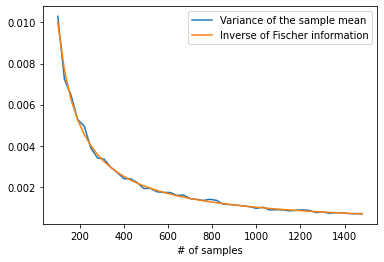

In [ ]:
plt.plot(num_samples, variances_of_sample_mean, label="Variance of the sample mean")
plt.plot(num_samples, 1/num_samples, label="Inverse of Fischer information")
plt.xlabel("# of samples")
plt.legend()

## 証明


## 参考
Rで学ぶ確率統計学 一変量統計編
黒木学 数理統計学
https://ja.wikipedia.org/wiki/%E3%83%95%E3%82%A3%E3%83%83%E3%82%B7%E3%83%A3%E3%83%BC%E6%83%85%E5%A0%B1%E9%87%8F
https://stats.biopapyrus.jp/glm/fisher-information.html

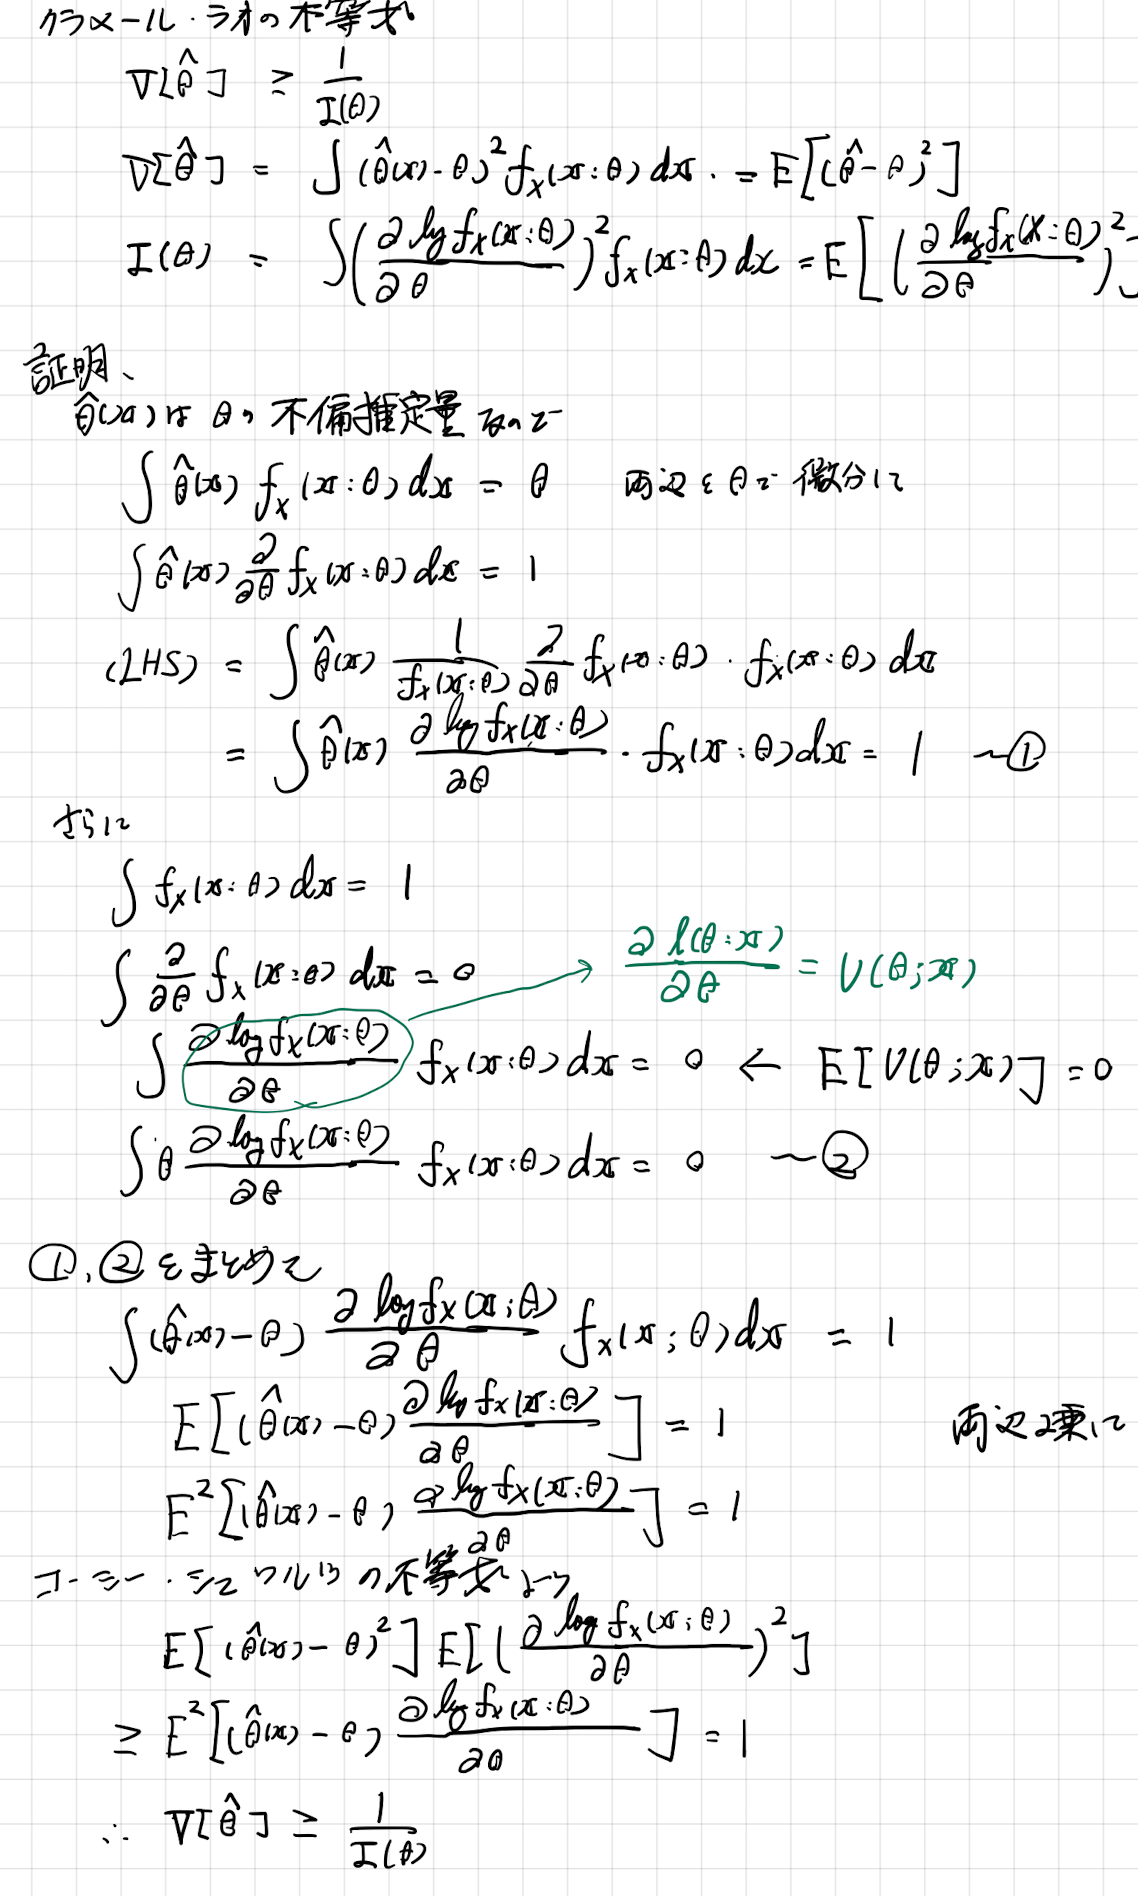

In [ ]:
import io
import PIL
from IPython.display import Image, display


def show_pil_img(img):  
    encoded = io.BytesIO()
    img.save(encoded, format='png')
    display(Image(encoded.getvalue()))


pil_img = PIL.Image.open("cramer_rao.png")
show_pil_img(pil_img)